<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2020)</h3>
    <hr>
    <h1>Quiz 2: CART and Random Forest</h1>
    <h3>October 1, 2020</h3>
</center>

Question Bank 1 (/1)
---

>Q. **Bootstrapping**: What is an example of a correct bootstrapped sample of the following dataset, assuming the sample size is the same as the dataset's size. {10, 14, 16, 8, 7}
>> {10, 10, 8, 7, 14}

> Q. **Bootstrapping**: What is an example of a correct bootstrapped sample of the following dataset, assuming the sample size is the same as the dataset's size. {8,7,4,3,9}
>> {8,7,7,7,9}

> Q. **Bootstrapping**: What is an example of a correct bootstrapped sample of the following dataset, assuming the sample size is the same as the dataset's size. {1, 2, 5, 3, 4}
>> {1, 2, 3, 2, 3}

Question Bank 2 (/2)
---

>Q. **CART vs RF:** What is one benefit and one downside of a CART model over a RF model?
>> A CART model is much more interpretable than an RF model but usually has lower accuracies. 


> Q. **CART vs RF:** What is one benefit and one downside of a RF model over a CART model?
>> A RF model generally gets more accurate results because of its ensemble nature but is usually less interpretable and requires longer computation times.

Question Bank 3 (/1)
---

>Q. **CART Parameters:** As you are training a CART model, decreasing the max depth will likely increase the presence of overfitting.
>> False


> Q. **CART Parameters:** As you are training a CART model, increasing the max depth will likely increase the presence of overfitting.
>> True

Question Bank 4 (/1)
---

> Q. **CART Splits:** In a CART model, where will the most important variables be split on in the final decision tree?
>> Near the top






# Section Two Instructions

*   Please use this Colab notebook to solve the questions in the coding section of Quiz Two. 
* Run the first two codeblocks to import the necessary packages and data for this quiz.
* The second code block will split your dataset into a training and testing set. Please use these splits to perform the necessary analysis. 
*  Any additional code you will need to answer the questions can be added to this notebook. Please remember to copy and paste the code at the bottom of the Quercus quiz after each coding question.

In [1]:
#Run this code before starting the quiz

# Import packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Load data
df = pd.read_csv("https://docs.google.com/uc?export=download&id=1PB8W6j7jhBpYcirIRFm-UQW7bhFvHt0c") 
# Set index
df = df.set_index('PassengerId')
# Print out data head
df.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_Size,Survived
PassengerId,,,,,,,,
1,22,0,7.2500,3,1,1,1,0
2,38,1,71.2833,1,0,3,1,1
3,26,0,7.9250,3,0,4,0,1
4,35,0,53.1000,1,0,3,1,1
5,35,0,8.0500,3,1,1,0,0


In this quiz, we are going to use the Titance Survival data set. This data set contains information on passengers aboard the Titanic and whether or not they survived the crash.  

The columns in the dataset are as follows:

* **PassengerId (Index)**:            (discrete) unique identifier for each passenger

* **Age**:            (discrete) age of the passenger

* **Embarked**:         (categorical) The port that the passenger board the ship from. 0 if Southampton, 1 if Cherbourg, 2 if Queenstown

* **Fare**:       (continous) Ticket fare the passenger paid

* **Pclass**:   (discrete) Ticket class of the passenger (1, 2, or 3)

* **Sex**:   (binary) 1 if male, 0 if female

* **Title**: (Categorical) Title of the passenger: 1 - Mr. | 2 - Master | 3 - Mrs. | 4 - Miss. 

* **Family Size**:  (continuous) Size of the passenger's family on board (including the passenger)

* **Survived (Target)**:   (binary) 1 if the passenger survived, 0 o/w


Use the following training and testing sets to answer the questions below.




In [2]:
# Make a training and testing parition
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Survived', 1), df['Survived'], 
    test_size=0.30, shuffle=False)

## __Question__ (/1)

**EDA:** How many passengers survived in the training set?

**EDA:** How many passengers did not survive in the training set?


In [ ]:
# Write your code here.

# -------------------

print('{} passengers survived in the training set'.format(y_train.sum()))
print('{} passengers did not survive in the training set'.format(len(y_train) - y_train.sum()))

# -------------------

244 passengers survived in the training set
370 passengers did not survive in the training set


___
## __Answer__:

244 passengers survived in the training set

370 passengers did not survive in the training set

___

## __Question__ (/1)

**Random Forest Model:** Build a random forest model using the `RandomForestClassifier` function to predict `Survived`. Use all of the features in the training set.  Set the random state to 0. Use 15 estimators in your model. Use a max depth of 15.

OR

**Random Forest Model:** Build a random forest model using the `RandomForestClassifier` function to predict `Survived`. Use all of the features in the training set.  Set the random state to 0. Use 20 estimators in your model. Use a max depth of 10.

**Random Forest Model:** Build a random forest model using the `RandomForestClassifier` function to predict `Survived`. Use all of the features in the training set.  Set the random state to 0. Use 25 estimators in your model. Use a max depth of 12.

In [9]:
# Write your code here.

# -------------------

# NOTE: Due to confusing wording in the question, I accepted an answer with the max_features parameter
# not specified, BUT, I also accepted max_features = None, which according to the documentation
# is how we make a model with all features included, which is technically the correct answer since 
# this is what the question asks for. Therefore:

clf = RandomForestClassifier(random_state=0, n_estimators=15, max_depth = 15, max_features=None)
# OR
# clf = RandomForestClassifier(random_state=0, n_estimators=20, max_depth = 10, max_features=None)
# clf = RandomForestClassifier(random_state=0, n_estimators=25, max_depth = 12, max_features=None)

# OR without max_features = None

# clf = RandomForestClassifier(random_state=0, n_estimators=15, max_depth = 15)
# clf = RandomForestClassifier(random_state=0, n_estimators=20, max_depth = 10)
# clf = RandomForestClassifier(random_state=0, n_estimators=25, max_depth = 12)

clf.fit(X_train, y_train)

# -------------------

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## __Question__ (/2)


**Random Forest Training:** Report the accuracy on  the training  set.

**Random Forest Training:** Report the accuracy on  the testing  set.



In [10]:
print('Training score = {} \t Testing score {}'.format(
    clf.score(X_train, y_train), 
    clf.score(X_test, y_test))
)


Training score = 0.9739413680781759 	 Testing score 0.7992424242424242


___
## __Answer__:

Training score 0.974, testing score 0.799. 

OR

Training score 0.946, testing score 0.822.

Training score 0.967, testing score 0.811.

___

## __Question__ (/1)

**Random Forest Understanding:** What makes this model particularly bad?

___
## __Answer__:

The model performs much better on the training set compared to the testing set, suggesting that we're overfitting.
___

## __Question__ (/3)
**Cross Validation RF Model:** Build a random forest model using the `RandomForestClassifier` function with 0.6 of the max features that predicts `Survived`. Set the random state to 0. Use 5-fold Cross validation for the `n_estimators` parameter from one of the sets below and draw a plot of the median test score of your folds for each value of the `n_estimators` parameter. Assume all other parameters are default.

Note, to perform the cross validation, you should use the function `cross_validate` from `sklearn.model_selection` (i.e., you do not need to manually code your own cross validation function.)

{5, 10, 15, 20, 25, 30, 35}

OR 

{30, 32, 34, 36, 38, 40}


{10, 20, 30, 40, 50, 60, 70, 80}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Cros Validation Results')

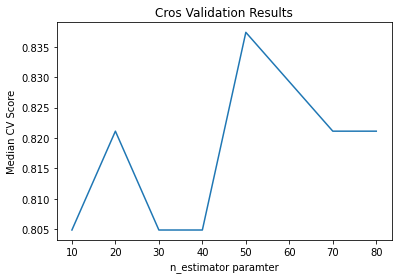

In [ ]:
# Write your code here.

# -------------------

n_estimators_range = [10, 20, 30, 40, 50, 60, 70, 80]
# OR 
# n_estimators_range = [5, 10 ,15, 20 ,25, 30, 35]
# n_estimators_range = [30 ,32 ,34, 36, 38, 40]


cv_scores = pd.Series(index=n_estimators_range)

for n_estimators in n_estimators_range:
  
  # Initialize the model
  rf_cv1_model = RandomForestClassifier(random_state=0, n_estimators=n_estimators, max_features=0.6)

  # Run cross validation to get measure of out-of-sample error
  example_cv_results = cross_validate(rf_cv1_model, X_train, y_train, cv=5)
  
  # Record the average out-of-sample error
  cv_scores.loc[n_estimators] = np.median(example_cv_results['test_score'])

plt.figure()
cv_scores.plot()
plt.xlabel('n_estimator paramter')
plt.ylabel('Median CV Score')
plt.title('Cros Validation Results')


## __Question__ (/1)

Cross Validation RF Results: What setting for `n_estimators` gets you the best model based on the median cv score?




In [ ]:
# Write your code here.

# -------------------

best_n_estimators = cv_scores.idxmax()
print('Set n_estimators={}'.format(best_n_estimators))
  
# -------------------

Set n_estimators=50


___
## __Answer__:

Best setting for `n_estimators` = 50

OR

Best setting for `n_estimators` = 20


Best setting for `n_estimators` = 38


___

## __Question__ (/1)

**CART Visualization:** Use the following CART decision tree to predict if the following passengers would survive or not.

<figure>
<img src="https://docs.google.com/uc?export=view&id=1AC2uqcQNMxG4ZQj4F-a-GDeK_sLrxPkU"
alt="" />
</figure>
<figure>

> Q. A person aged 35 with the title "Mr." who had a ticket class of 1 and and family size of 3.
>> Didn't Survive

> Q. A person aged 24, with the title "Miss." who had a family size of 4, a ticket class of 2 and a fare of $35.
>> Survived

> Q. A person with title "Mrs." who had a family size of 2, a fare costing $120, a ticket class of 3
>> Survived